第8章 グラフィカルモデル
==

In [133]:
from matplotlib.font_manager import FontProperties

# matplotlibで日本語フォント
fp = FontProperties(fname=r'/System/Library/Fonts/ヒラギノ角ゴ ProN W3')

画像のノイズ除去で利用されるマルコフ確率場を表現する無向グラフ
--

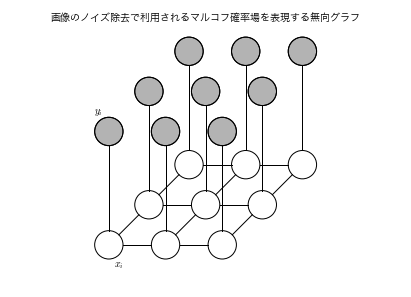

In [ ]:
from daft import PGM, Node

pgm = PGM([7, 5], origin=(-3.5, -1.5), directed=False)

for row in range(-1, 2):
    y = float(row) * 1. / (2 ** 0.5)
    for col in range(-1, 2):
        x = col + y
        if row == -1 and col == -1:
            label = r'$x_{i}$', r'$y_{i}$'
        else:
            label = '', ''
        pgm.add_node(Node('x_{}_{}'.format(row, col), label[0], x, y, offset=(10, -20)))
        pgm.add_node(Node('y_{}_{}'.format(row, col), label[1], x, y + 2, observed=True, 
                          offset=(-10, 20)))

for row in range(-1, 2):
    for col in range(-1, 2):
        if row + 1 < 2:
            pgm.add_edge('x_{}_{}'.format(row, col), 'x_{}_{}'.format(row + 1, col))
        if col + 1 < 2:
            pgm.add_edge('x_{}_{}'.format(row, col), 'x_{}_{}'.format(row, col + 1))
        pgm.add_edge('x_{}_{}'.format(row, col), 'y_{}_{}'.format(row, col))

pgm.render()
plt.suptitle(u'画像のノイズ除去で利用されるマルコフ確率場を表現する無向グラフ')
plt.savefig('PGM.png', dpi=220)

例：画像のノイズ除去
--

In [ ]:
import matplotlib.pyplot as plt
from skimage.data import checkerboard
%matplotlib inline

x = np.where(checkerboard() >= 128, 1, -1)
y = np.where(np.random.rand(x.shape[0], x.shape[1]) >= 0.1, x, x * -1)

def energy(x, y, beta=1., eta=1., h=0.):
    """ エネルギー関数 """
    e = np.sum(x) * h 
    e -= beta * np.sum(x * np.roll(x, 1, axis=0) + x * np.roll(x, 1, axis=1))
    e -= eta * np.sum(x * y)
    return e

def ICM(y, niter=10):
    """ 反復条件付きモード（ICM; iterated conditional modes）"""
    recon = y.copy()
    for i in range(niter):
        e = energy(recon, y)
        e_old = e
        print(i, e)
        for row in range(recon.shape[0]):
            for col in range(recon.shape[1]):
                recon[row, col] *= -1
                e2 = energy(recon, y)
                if e < e2:
                    recon[row, col] *= -1
                else:
                    e = e2
        if e == e_old:
            break
    return recon
        
recon = ICM(y)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(x, cmap='gray')
ax[1].imshow(y, cmap='gray')
ax[2].imshow(recon, cmap='gray')
ax[0].set_title(u'真の解')
ax[1].set_title(u'10%のピクセルを反転')
ax[2].set_title(u'復元（ICM）')

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.suptitle(r'$h=0, \beta=1, \eta=1$')
plt.tight_layout()
plt.savefig('MRF-ICM.png', dpi=220)

0 -87300.0
1 -105294.0
2 -105636.0
3